<h1><center>TP : Cue3, le robot plus fort que les champions de basket</center></h1>
<img src="https://media.giphy.com/media/bxt40W1QkBh0DQp3em/giphy.gif" 
     width="500"
     height="500"
     style="float:left;margin:10px">

**Cue3** est un robot basketteur construit par l'entreprise japonaise **Toyota**. En 2018, Cue3 est entré dans le Guinness Book des records en réussissant à enchainer 2020 paniers d'affilé. (voir vidéo du premier panier à gauche) <br>
<br>


<h2><center>Problématique: Comment les ingénieurs de Toyota réussissent-ils à prévoir la trajectoire du ballon ?</center></h2>
<br>
Nous allons voir dans ce TP que la réponse à cette question réside dans <b>la Seconde loi de Newton</b> ...
<br>
<br> <b>Rappel :</b> Seconde Loi de Newton (1687)
<center> $\vec{F}=m\times \frac{\Delta \vec{v}}{\Delta t}$</center>
<br>
<br>
<b>Données </b>:<br>
-La masse du ballon de basket vaut 600g.<br>
-La durée séparant 2 images successives de la vidéo vaut 40ms<br>
-L'intensité de pesanteur vaut $g = 9,81 N\cdot kg^{-1}$.<br>

<h2> PARTIE 1 : Position initiale, vitesse initiale et force résultante </h2>
<br>

<b>Travail 1 :</b> Complète le code ci-dessous lorsqu'il est écrit "A COMPLETER" en bout de ligne. <br>
<b>Indices :</b> Tu trouveras des indices sur le polycopié du TP. 

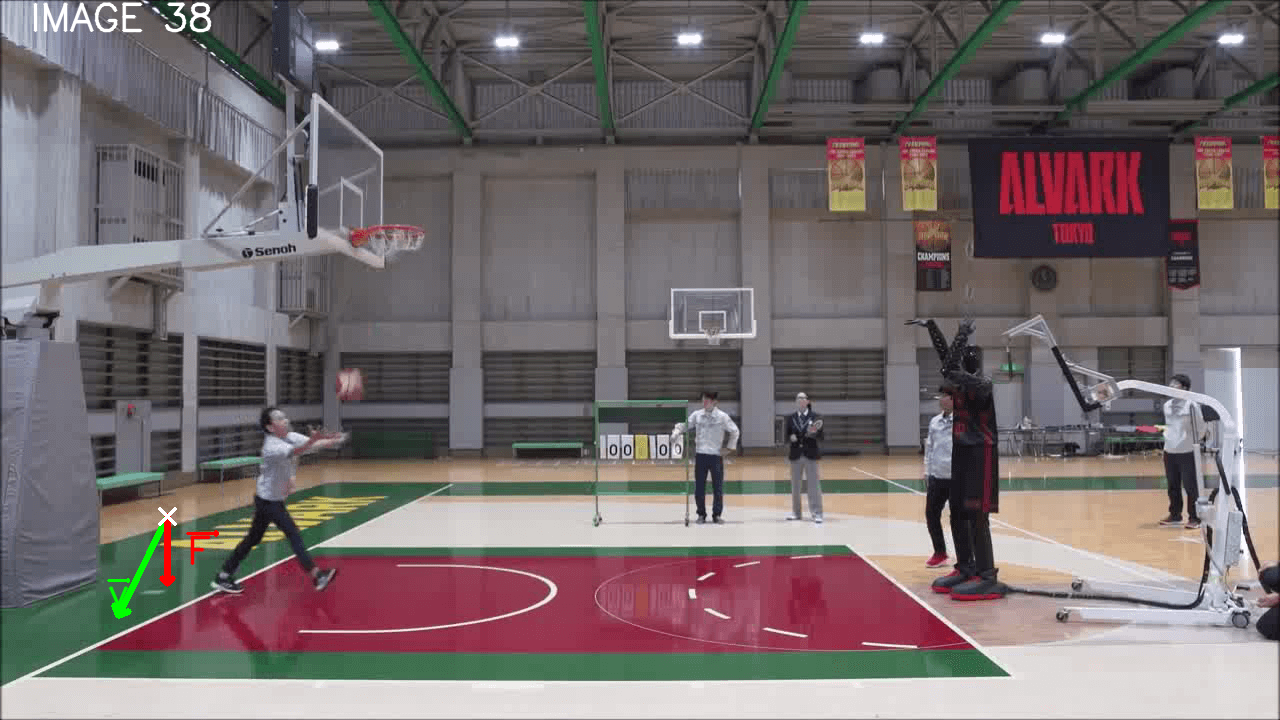

In [4]:
## ================= SECTION 0 : IMPORTATION DES EXTENSIONS (ne pas modifier) =======================
from vecteur import Vecteur                                                  #ne pas modifier
from modelisation import Modelisation                                        #ne pas modifier
import cv2                                                                   #ne pas modifier
modelisation = Modelisation()                                                #ne pas modifier


#===================SECTION 1 : POSITION INITIALE DU BALON (x, y) =========================
x  =  8           # Position initiale (en m) du ballon                         (A COMPLETER)
y  =   4          #                                                            (A COMPLETER)
OM = Vecteur(x,y) # vecteur position initial                                   ne pas modifier

#===================SECTION 2 : VITESSE INITIALE DU BALLON (vx, vy) =========================
vx =  -4.3   # vitesse initiale en m/s (composante suivant l'axe des x)     (A COMPLETER)
vy =   6.2   # vitesse initiale en m/s(composante suivant l'axe des x)      (A COMPLETER)
v = Vecteur(vx,vy) # Vecteur vitesse                                        Ne pas modifier

#===================SECTION 3 : BILAN DES FORCES EXERCEES SUR LE BALLON =========================
m = 0.600   #masse du ballon de basket en kg                                    (A COMPLETER) 
g = 9.81   #Intensité de pesanteur en N/kg                                      (A COMPLETER)

F_x = 0       # Force résultante en N (composante suivant l'axe des x)          (A COMPLETER)
F_y = -m*g       # Force résultante en N (composante suivant l'axe des x)       (A COMPLETER)
F   = Vecteur (F_x ,F_y ) # Vecteur force résultante                            (A COMPLETER) 

modelisation.show(OM,v,F)   #Affichage des résultats                  Ne pas modifier

#===================SECTION 4 : Sauvegarde des paramètres NE PAS MODIFIER =========================
OMi =OM  #sauvegarde du vecteur position initiale dans la variable "OMi"        Ne pas modifier                                
Fi = F   #sauvegarde du vecteur force résultante initiale dans la variable "Fi" Ne pas modifier
vi = v   #sauvegarde du vecteur vitesse initiale dans la variable "vi"          Ne pas modifier

<b>Travail 2 :</b> Une fois que tu as complété le code ci-dessus, exécute le.  Pour cela, il faut cliquer quelque part dans la fenêtre du code puis cliquer sur la flèche en haut de la page: 
<img src="img/fleche.png" 
     width="300"
     height="300"
     style="float:left;margin:10px">

<b>Travail 3 :</b> Vérifie que sur l'image qui est apparue, le vecteur vitesse et le vecteur force sont correctement positionné. Si ce n'est pas le cas, tu as fait une erreur dans le code...

<h2> PARTIE 2 : Prévision des positions suivantes grâce à la seconde loi de Newton </h2>

<b> Travail 4 :</b> Compléte le code ci-dessous pour prévoir la position suivante.
<b> Indices </b> : Des indices sont disponibles sur le polycopié

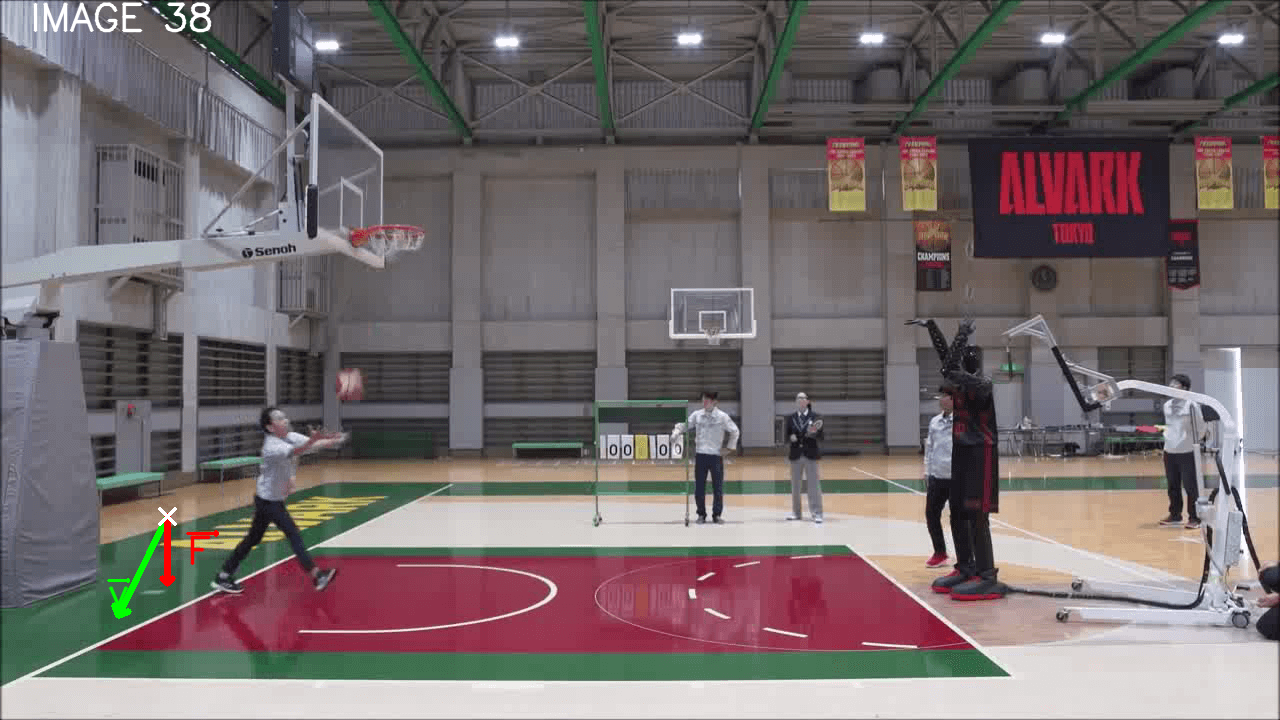

In [5]:
#=====================SECTION A- CHARGEMENT DES PARAMETRES INITIAUX (NE PAS MODIFIER)================
OM = OMi                                                                                  #ne pas modifier
F  = Fi                                                                                   #ne pas modifier
v  = vi                                                                                   #ne pas modifier
modelisation = Modelisation()                                                             #ne pas modifier
modelisation.show(OM,v,F)                                                                 #ne pas modifier 

#=====================SECTION B- CALCUL DES POSITIONS ET VITESSES SUIVANTES GRACE A LA SECONDE LOI DE NEWTON

deltat = 40e-3  #durée (en seconde) entre 2 images successives                            (A COMPLETER)          

for i in range(38): #On répète pour les 38 images de la vidéos       #ne pas modifier
    v = v + deltat*F/m               # vitesse suivante = vitesse précédente + ......... # (A COMPLETER) 
    
    OM = OM + v*deltat               # position suivante = position précédente + ......... # (A COMPLETER)                                                   
    
    modelisation.show(OM,v,F) # Affichage des positions successives                    (ne pas modifier)

<h2>PARTIE 3 : Prise en compte du frottement de l'air sur le ballon</h2>
<img src="img/magnus.png" 
     width="300"
     height="300"
     style="float:left;margin:10px">
<br>
<br>
On remarque que la prévision théorique est un peu éloignée de l'expérience. En effet, nous n'avons pas pris en compte les forces de frottement de l'air sur le ballon. <br> Le robot Cue3 donne un petit effet sur le ballon pour le faire entrer en rotation dans l'air(voir schéma à gauche). Cet effet a pour conséquence, de créer <u>une force supplémentaire vers le bas.</u> C'est ce qu'on appelle <b>l'effet Magnus</b>. <u>Cette nouvelle force a pour valeur 1/10e de la valeur du poids du ballon</u>. 


<b>Travail 1 :</b> Complète le code ci dessous en modifiant la valeur du vecteur $\vec{F}$ pour prendre en compte les forces de frottement de l'air.

In [ ]:
#=====================SECTION A- CHARGEMENT DES PARAMETRES INITIAUX (NE PAS MODIFIER)================
OM = OMi                                                                                  #ne pas modifier
F  = Fi +Vecteur(0,-m*g/10)  #Ajouter la force de frottement de l'air                         (A COMPLETER)
v  = vi                                                                                   #ne pas modifier
modelisation = Modelisation()                                                             #ne pas modifier
modelisation.show(OM,v,F)                                                                 #ne pas modifier 

#=====================SECTION B- CALCUL DES POSITIONS ET VITESSES SUIVANTES GRACE A LA SECONDE LOI DE NEWTON

deltat = 40e-3  #durée (en seconde) entre 2 images successives                            (A COMPLETER IDENTIQUE A PARTIE 2)          

for i in range(38): #On répète pour les 38 images de la vidéos       #ne pas modifier
    v = v + deltat*F/m               # vitesse suivante = vitesse précédente + ......... # (A COMPLETER IDENTIQUE A PARTIE 2) 
    
    OM = OM + v*deltat               # position suivante = position précédente + ......... # (A COMPLETER IDENTIQUE A PARTIE 2)                                                  
    
    modelisation.show(OM,v,F) # Affichage des positions successives                    (ne pas modifier)